## A Machine Learning approach to classifying $b$-matrices by cluster algebra: Keras with convolution layers

This notebook is a continuation of the previous few. Our goal is to explore the application of machine learning algorithms to classifications of $b$-matrices in cluster algebras. Before we mapped the matrices to vectors, which became the inputs for our models. Here we keep the matrix structure and use Keras with convolution layers instead. This was inspired by the recent (2020) work of [1]. 

The $b$-matrices mentioned above are generated in a supplementary worksheet running the Sage kernel, to make use of the Sage package for cluster algebras https://doc.sagemath.org/html/en/reference/algebras/sage/algebras/cluster_algebra.html. Interested readers may make use of the compendium for this package [2].

<cite data-cite="bao">[1] Bao, Jiakang, et al. "Quiver mutations, Seiberg duality, and machine learning." Physical Review D 102.8 (2020): 086013.</cite> https://arxiv.org/abs/2006.10783

<cite data-cite="musiker">[2] Musiker, Gregg, and Christian Stump. "A compendium on the cluster algebra and quiver package in Sage." arXiv preprint arXiv:1102.4844 (2011). </cite> https://arxiv.org/abs/1102.4844

## Contents:
* [Importing the $A_5$ and $D_5$ data](#1)
* [Keras models for $A_5$ and $D_5$ with convolution](#2)
* [The same Keras model with $A_6$ and $D_6$](#3)
* [Ternary classification with $A_6$, $D_6$ and $E_6$](#4)

## Importing the $A_5$ and $D_5$ data <a class="anchor" id="1"></a>

Here we import our $A_5$ and $D_5$ data. We have to reshape our feature variables $X$ as matrices.

In [1]:
import numpy as np
import csv
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import *

In [2]:
# A5

with open('cluster_data_A5_depth_100.csv') as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    data = [row for row in reader]
data=data[0]
cluster_type = data[0]
data = [np.array(np.matrix(data[i])).ravel() for i in range(1, len(data))]
data = [np.append(i, np.array([1, 0])) for i in data]
A5_data = data
A5_array = A5_data[0]
for i in range(1, len(A5_data)):
    A5_array = np.vstack([A5_array, A5_data[i]])
    
# D5

with open('cluster_data_D5_depth_100.csv') as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    data = [row for row in reader]    
data=data[0]
cluster_type = data[0]
data = [np.array(np.matrix(data[i])).ravel() for i in range(1, len(data))]
data = [np.append(i, np.array([0, 1])) for i in data]
D5_data = data
D5_array = D5_data[0]
for i in range(1, len(D5_data)):
    D5_array = np.vstack([D5_array, D5_data[i]])
    
# Features
X = np.vstack([A5_array[:,:-2], D5_array[:,:-2]])

# Reshape as matrices
Z = np.array([np.resize(X[0], (5,5))])
for i in range(1, len(X)):
    new = np.resize(X[i], (5,5))
    new2 = np.array([new])
    Z = np.append(Z, new2, axis=0)

X = Z

# Targets
y = np.vstack([A5_array[:,-2:], D5_array[:,-2:]])

# Train / test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

## Keras models for $A_5$ and $D_5$ with convolution <a class="anchor" id="2"></a>

Here we run a simple Keras model with one convolution layer. With a large number of epochs we can achieve accuracies of $0.7$, which is okay for such a simple model.

In [3]:
input_shape = (5, 5, 1)

model = Sequential([
    Input(shape=input_shape),
    Conv2D(filters=25, kernel_size=[2,2]), 
    Activation("relu"),
    Flatten(),
    Dense(2)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)

model.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(0.001),
    metrics = ["accuracy"],
)
history = model.fit(X_train, y_train, batch_size=30, epochs=1000, validation_split=0.2, verbose=True, callbacks=[callback])
test_scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/1000
75/75 [==============================] - 1s 4ms/step - loss: 0.6937 - accuracy: 0.5150 - val_loss: 0.6912 - val_accuracy: 0.5233
Epoch 2/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5307 - val_loss: 0.6904 - val_accuracy: 0.5179
Epoch 3/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5307 - val_loss: 0.6901 - val_accuracy: 0.5161
Epoch 4/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5459 - val_loss: 0.6900 - val_accuracy: 0.5143
Epoch 5/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5428 - val_loss: 0.6892 - val_accuracy: 0.5215
Epoch 6/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5710 - val_loss: 0.6875 - val_accuracy: 0.5394
Epoch 7/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5558 - val_loss: 0.6894 - val_accuracy: 0.5430
Epoch 

75/75 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.6970 - val_loss: 0.6162 - val_accuracy: 0.6505
Epoch 59/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.6992 - val_loss: 0.6185 - val_accuracy: 0.6452
Epoch 60/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7046 - val_loss: 0.6141 - val_accuracy: 0.6523
Epoch 61/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.6979 - val_loss: 0.6124 - val_accuracy: 0.6541
Epoch 62/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.7037 - val_loss: 0.6130 - val_accuracy: 0.6649
Epoch 63/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7046 - val_loss: 0.6139 - val_accuracy: 0.6505
Epoch 64/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7073 - val_loss: 0.6160 - val_accuracy: 0.6577
Epoch 65/1000

75/75 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7167 - val_loss: 0.6069 - val_accuracy: 0.6720
Epoch 116/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7154 - val_loss: 0.6099 - val_accuracy: 0.6774
Epoch 117/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7158 - val_loss: 0.6160 - val_accuracy: 0.6649
Epoch 118/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7194 - val_loss: 0.6087 - val_accuracy: 0.6631
Epoch 119/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7167 - val_loss: 0.6077 - val_accuracy: 0.6685
Epoch 120/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7163 - val_loss: 0.6080 - val_accuracy: 0.6774
Epoch 121/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7176 - val_loss: 0.6080 - val_accuracy: 0.6756
Epoch 1

Epoch 172/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.5474 - accuracy: 0.7270 - val_loss: 0.6051 - val_accuracy: 0.6720
Epoch 173/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.5469 - accuracy: 0.7212 - val_loss: 0.6055 - val_accuracy: 0.6792
Epoch 174/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7284 - val_loss: 0.6078 - val_accuracy: 0.6738
Epoch 175/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.5478 - accuracy: 0.7243 - val_loss: 0.6063 - val_accuracy: 0.6738
Epoch 176/1000
75/75 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7293 - val_loss: 0.6080 - val_accuracy: 0.6810
Epoch 177/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7230 - val_loss: 0.6039 - val_accuracy: 0.6774
Epoch 178/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7270 - val_loss: 0.6085 - val_accuracy:

Epoch 229/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7297 - val_loss: 0.6052 - val_accuracy: 0.6756
Epoch 230/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7360 - val_loss: 0.6011 - val_accuracy: 0.6792
Epoch 231/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7315 - val_loss: 0.6007 - val_accuracy: 0.6828
Epoch 232/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7320 - val_loss: 0.6003 - val_accuracy: 0.6810
Epoch 233/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.7297 - val_loss: 0.6139 - val_accuracy: 0.6703
Epoch 234/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7346 - val_loss: 0.6051 - val_accuracy: 0.6846
Epoch 235/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7306 - val_loss: 0.6026 - val_accuracy:

Epoch 286/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7320 - val_loss: 0.5990 - val_accuracy: 0.6756
Epoch 287/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5320 - accuracy: 0.7333 - val_loss: 0.5993 - val_accuracy: 0.6774
Epoch 288/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.7346 - val_loss: 0.5984 - val_accuracy: 0.6828
Epoch 289/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7342 - val_loss: 0.6035 - val_accuracy: 0.6882
Epoch 290/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7324 - val_loss: 0.6111 - val_accuracy: 0.6685
Epoch 291/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7396 - val_loss: 0.5999 - val_accuracy: 0.6810
Epoch 292/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.7396 - val_loss: 0.5982 - val_accuracy:

Epoch 343/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7387 - val_loss: 0.6064 - val_accuracy: 0.6738
Epoch 344/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.7369 - val_loss: 0.6004 - val_accuracy: 0.6810
Epoch 345/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7351 - val_loss: 0.6037 - val_accuracy: 0.6738
Epoch 346/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7405 - val_loss: 0.6016 - val_accuracy: 0.6774
Epoch 347/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7360 - val_loss: 0.5974 - val_accuracy: 0.6864
Epoch 348/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7382 - val_loss: 0.6069 - val_accuracy: 0.6738
Epoch 349/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7373 - val_loss: 0.5977 - val_accuracy:

Epoch 400/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7396 - val_loss: 0.6025 - val_accuracy: 0.6703
Epoch 401/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7338 - val_loss: 0.6020 - val_accuracy: 0.6756
Epoch 402/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7378 - val_loss: 0.5979 - val_accuracy: 0.6756
Epoch 403/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5236 - accuracy: 0.7414 - val_loss: 0.6031 - val_accuracy: 0.6774
Epoch 404/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7445 - val_loss: 0.6025 - val_accuracy: 0.6774
Epoch 405/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7391 - val_loss: 0.5992 - val_accuracy: 0.6756
Epoch 406/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.7414 - val_loss: 0.5980 - val_accuracy:

Epoch 457/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7418 - val_loss: 0.6058 - val_accuracy: 0.6720
Epoch 458/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7409 - val_loss: 0.6061 - val_accuracy: 0.6738
Epoch 459/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7463 - val_loss: 0.6053 - val_accuracy: 0.6685
Epoch 460/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7351 - val_loss: 0.6003 - val_accuracy: 0.6792
Epoch 461/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7418 - val_loss: 0.6001 - val_accuracy: 0.6828
Epoch 462/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7387 - val_loss: 0.6060 - val_accuracy: 0.6667
Epoch 463/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7405 - val_loss: 0.6034 - val_accuracy:

Epoch 514/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7423 - val_loss: 0.5998 - val_accuracy: 0.6774
Epoch 515/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7441 - val_loss: 0.6058 - val_accuracy: 0.6685
Epoch 516/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7400 - val_loss: 0.6059 - val_accuracy: 0.6720
Epoch 517/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7387 - val_loss: 0.6111 - val_accuracy: 0.6685
Epoch 518/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7373 - val_loss: 0.6029 - val_accuracy: 0.6792
Epoch 519/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7333 - val_loss: 0.6081 - val_accuracy: 0.6756
Epoch 520/1000
75/75 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7414 - val_loss: 0.6046 - val_accuracy:

The plot shows that accuracy stops improving around epoch $75$, for both training and testing data.

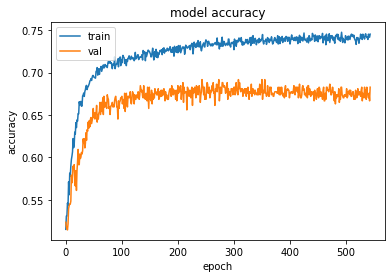

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The following model is much more complicated. We have $3$ convolution layers followed by $2$ dense layers, and then the output. We run this for a large number of epochs to see if the training stops eventually. We also have a polynomial training schedule so that the learning rate decreases, though not as quickly as with an exponential schedule. We are using dropout on the dense layers to prevent overfitting.

In [18]:
input_shape = (5, 5, 1)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

model = Sequential([
    Input(shape=input_shape),
    Conv2D(filters=100, kernel_size=[2,2]), 
    Activation("relu"),
    Conv2D(filters=30, kernel_size=[2,2]),
    Activation("elu"),
    Conv2D(filters=20, kernel_size=[2,2]),
    Activation("elu"),
    Dense(60),
    Activation("elu"),
    Dropout(rate=0.1),
    Dense(10),
    Activation("elu"),
    Dropout(rate=0.2),
    Flatten(),
    Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1e-2,
    decay_steps=500,
    end_learning_rate=1e-3,
    power=0.5)

model.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr_schedule),
    metrics = ["accuracy"],
)
history = model.fit(X_train, y_train, batch_size=500, epochs=1000, validation_split=0.2, verbose=True, callbacks=[callback])
test_scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/1000
5/5 [==============================] - 1s 77ms/step - loss: 0.6990 - accuracy: 0.5052 - val_loss: 0.6972 - val_accuracy: 0.5287
Epoch 2/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.6981 - accuracy: 0.5173 - val_loss: 0.6894 - val_accuracy: 0.5376
Epoch 3/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.6884 - accuracy: 0.5298 - val_loss: 0.6793 - val_accuracy: 0.5986
Epoch 4/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.6759 - accuracy: 0.5809 - val_loss: 0.6834 - val_accuracy: 0.6004
Epoch 5/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.6679 - accuracy: 0.6020 - val_loss: 0.6624 - val_accuracy: 0.6057
Epoch 6/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.6542 - accuracy: 0.6212 - val_loss: 0.6640 - val_accuracy: 0.5878
Epoch 7/1000
5/5 [==============================] - 0s 21ms/step - loss: 0.6436 - accuracy: 0.6307 - val_loss: 0.6602 - val_accuracy: 0.6237
Epoch 8/1000


Epoch 59/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.2354 - accuracy: 0.8853 - val_loss: 0.3463 - val_accuracy: 0.8459
Epoch 60/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.2266 - accuracy: 0.9054 - val_loss: 0.3460 - val_accuracy: 0.8441
Epoch 61/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.2342 - accuracy: 0.8956 - val_loss: 0.3269 - val_accuracy: 0.8584
Epoch 62/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.2343 - accuracy: 0.9036 - val_loss: 0.3650 - val_accuracy: 0.8602
Epoch 63/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.2038 - accuracy: 0.9072 - val_loss: 0.3039 - val_accuracy: 0.8692
Epoch 64/1000
5/5 [==============================] - 0s 30ms/step - loss: 0.1945 - accuracy: 0.9171 - val_loss: 0.3378 - val_accuracy: 0.8548
Epoch 65/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.1975 - accuracy: 0.9099 - val_loss: 0.2785 - val_accuracy: 0.8835
Epoch 

5/5 [==============================] - 0s 27ms/step - loss: 0.0221 - accuracy: 0.9937 - val_loss: 0.3666 - val_accuracy: 0.9194
Epoch 174/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0254 - accuracy: 0.9928 - val_loss: 0.3670 - val_accuracy: 0.9194
Epoch 175/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0236 - accuracy: 0.9933 - val_loss: 0.3788 - val_accuracy: 0.9194
Epoch 176/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0278 - accuracy: 0.9888 - val_loss: 0.3832 - val_accuracy: 0.9229
Epoch 177/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0269 - accuracy: 0.9901 - val_loss: 0.3867 - val_accuracy: 0.9158
Epoch 178/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.3904 - val_accuracy: 0.9086
Epoch 179/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.3917 - val_accuracy: 0.9122
Epoch 180/1000

5/5 [==============================] - 0s 27ms/step - loss: 0.0148 - accuracy: 0.9937 - val_loss: 0.4468 - val_accuracy: 0.9194
Epoch 288/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0241 - accuracy: 0.9960 - val_loss: 0.4528 - val_accuracy: 0.9158
Epoch 289/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.4551 - val_accuracy: 0.9068
Epoch 290/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0227 - accuracy: 0.9915 - val_loss: 0.4523 - val_accuracy: 0.9158
Epoch 291/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.4682 - val_accuracy: 0.9140
Epoch 292/1000
5/5 [==============================] - 0s 28ms/step - loss: 0.0214 - accuracy: 0.9919 - val_loss: 0.4837 - val_accuracy: 0.9194
Epoch 293/1000
5/5 [==============================] - 0s 27ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.4729 - val_accuracy: 0.9194
Epoch 294/1000

5/5 [==============================] - 0s 26ms/step - loss: 0.0129 - accuracy: 0.9964 - val_loss: 0.5162 - val_accuracy: 0.9211
Epoch 402/1000
5/5 [==============================] - 0s 29ms/step - loss: 0.0146 - accuracy: 0.9946 - val_loss: 0.5208 - val_accuracy: 0.9194
Epoch 403/1000
5/5 [==============================] - 0s 35ms/step - loss: 0.0124 - accuracy: 0.9955 - val_loss: 0.5272 - val_accuracy: 0.9247
Epoch 404/1000
5/5 [==============================] - 0s 38ms/step - loss: 0.0111 - accuracy: 0.9951 - val_loss: 0.5345 - val_accuracy: 0.9229
Epoch 405/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0187 - accuracy: 0.9928 - val_loss: 0.5190 - val_accuracy: 0.9229
Epoch 406/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0141 - accuracy: 0.9946 - val_loss: 0.4956 - val_accuracy: 0.9247
Epoch 407/1000
5/5 [==============================] - 0s 31ms/step - loss: 0.0139 - accuracy: 0.9951 - val_loss: 0.5119 - val_accuracy: 0.9265
Epoch 408/1000

5/5 [==============================] - 0s 26ms/step - loss: 0.0165 - accuracy: 0.9928 - val_loss: 0.6281 - val_accuracy: 0.9176
Epoch 516/1000
5/5 [==============================] - 0s 24ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.6015 - val_accuracy: 0.9176
Epoch 517/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.5872 - val_accuracy: 0.9122
Epoch 518/1000
5/5 [==============================] - 0s 26ms/step - loss: 0.0169 - accuracy: 0.9955 - val_loss: 0.5705 - val_accuracy: 0.9176
Epoch 519/1000
5/5 [==============================] - 0s 25ms/step - loss: 0.0084 - accuracy: 0.9960 - val_loss: 0.5587 - val_accuracy: 0.9122
Epoch 520/1000
5/5 [==============================] - 0s 23ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.5622 - val_accuracy: 0.9176
Epoch 521/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.5721 - val_accuracy: 0.9122
Epoch 522/1000

Our plot shows that we start seeing accuracies of over $0.9$ at around epoch $100$. After this the accuracies don't improve much. 

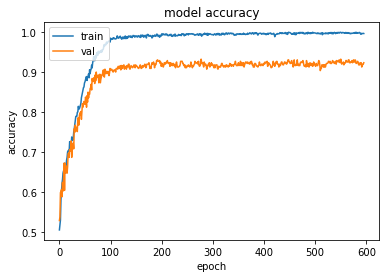

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## The same Keras model with $A_6$ and $D_6$ <a class="anchor" id="3"></a>

Now we look at the $b$-matrices for $A_6$ and $D_6$.

In [11]:
# A6

with open('cluster_data_A6_depth_6.csv') as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    data = [row for row in reader]
    
data=data[0]
cluster_type = data[0]
data = [np.array(np.matrix(data[i])).ravel() for i in range(1, len(data))]                                                                           
data = [np.append(i, np.array([1, 0])) for i in data]
A6_data = data
A6_array = A6_data[0]
for i in range(1, len(A6_data)):
    A6_array = np.vstack([A6_array, A6_data[i]])
    
# D6

with open('cluster_data_D6_depth_6.csv') as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    data = [row for row in reader]
    
data=data[0]
cluster_type = data[0]
data = [np.array(np.matrix(data[i])).ravel() for i in range(1, len(data))]                                                                         
data = [np.append(i, np.array([0, 1])) for i in data]
D6_data = data
D6_array = D6_data[0]
for i in range(1, len(D6_data)):
    D6_array = np.vstack([D6_array, D6_data[i]])

# Features, targets
X = np.vstack([A6_array[:,:-2], D6_array[:,:-2]])

# Reshape as matrices
Z = np.array([np.resize(X[0], (6,6))])
for i in range(1, len(X)):
    new = np.resize(X[i], (6,6))
    new2 = np.array([new])
    Z = np.append(Z, new2, axis=0)

X = Z
y = np.vstack([A6_array[:,-2:], D6_array[:,-2:]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

We use a similar model to before, except with a different arrangement of dense layers. We run this for a long time but we do get very high accuracies, exceeding $0.93$.

In [13]:
input_shape = (6, 6, 1)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

model = Sequential([
    Input(shape=input_shape),
    Conv2D(filters=100, kernel_size=[2,2]), 
    Activation("relu"),
    Dense(100),
    Activation("elu"),
    Conv2D(filters=20, kernel_size=[2,2]),
    Dense(20),
    Activation("elu"),
    Conv2D(filters=10, kernel_size=[2,2]),
    Activation("elu"),
    Dropout(rate=0.1),
    Dense(10),
    Activation("elu"),
    Dropout(rate=0.2), 
    Flatten(),
    Dense(2)
])

lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1e-2,
    decay_steps=500,
    end_learning_rate=1e-3,
    power=0.5)

model.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(lr_schedule),
    metrics = ["accuracy"],
)
history = model.fit(X_train, y_train, batch_size=500, epochs=1000, validation_split=0.2, verbose=True, callbacks=[callback])
test_scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/1000
21/21 [==============================] - 2s 66ms/step - loss: 0.6694 - accuracy: 0.5844 - val_loss: 0.6592 - val_accuracy: 0.5958
Epoch 2/1000
21/21 [==============================] - 1s 43ms/step - loss: 0.6533 - accuracy: 0.6192 - val_loss: 0.6914 - val_accuracy: 0.5942
Epoch 3/1000
21/21 [==============================] - 1s 49ms/step - loss: 0.6805 - accuracy: 0.5778 - val_loss: 0.6623 - val_accuracy: 0.5906
Epoch 4/1000
21/21 [==============================] - 1s 46ms/step - loss: 0.6623 - accuracy: 0.6052 - val_loss: 0.6112 - val_accuracy: 0.6705
Epoch 5/1000
21/21 [==============================] - 1s 42ms/step - loss: 0.6225 - accuracy: 0.6478 - val_loss: 0.5777 - val_accuracy: 0.6929
Epoch 6/1000
21/21 [==============================] - 1s 43ms/step - loss: 0.5936 - accuracy: 0.6758 - val_loss: 0.7544 - val_accuracy: 0.5242
Epoch 7/1000
21/21 [==============================] - 1s 45ms/step - loss: 0.6997 - accuracy: 0.5676 - val_loss: 0.6562 - val_accuracy: 0.6086

Epoch 58/1000
21/21 [==============================] - 1s 49ms/step - loss: 0.4131 - accuracy: 0.8057 - val_loss: 0.4003 - val_accuracy: 0.8073
Epoch 59/1000
21/21 [==============================] - 1s 58ms/step - loss: 0.4350 - accuracy: 0.7933 - val_loss: 0.3968 - val_accuracy: 0.8145
Epoch 60/1000
21/21 [==============================] - 1s 52ms/step - loss: 0.4171 - accuracy: 0.8035 - val_loss: 0.3890 - val_accuracy: 0.8193
Epoch 61/1000
21/21 [==============================] - 1s 51ms/step - loss: 0.4108 - accuracy: 0.8101 - val_loss: 0.3878 - val_accuracy: 0.8209
Epoch 62/1000
21/21 [==============================] - 1s 51ms/step - loss: 0.4262 - accuracy: 0.7956 - val_loss: 0.4059 - val_accuracy: 0.8021
Epoch 63/1000
21/21 [==============================] - 1s 51ms/step - loss: 0.4147 - accuracy: 0.8034 - val_loss: 0.3909 - val_accuracy: 0.8181
Epoch 64/1000
21/21 [==============================] - 1s 47ms/step - loss: 0.4056 - accuracy: 0.8071 - val_loss: 0.3860 - val_accuracy:

Epoch 115/1000
21/21 [==============================] - 1s 48ms/step - loss: 0.3721 - accuracy: 0.8310 - val_loss: 0.3354 - val_accuracy: 0.8565
Epoch 116/1000
21/21 [==============================] - 1s 49ms/step - loss: 0.3595 - accuracy: 0.8400 - val_loss: 0.3261 - val_accuracy: 0.8637
Epoch 117/1000
21/21 [==============================] - 1s 50ms/step - loss: 0.3514 - accuracy: 0.8430 - val_loss: 0.3239 - val_accuracy: 0.8641
Epoch 118/1000
21/21 [==============================] - 1s 50ms/step - loss: 0.3514 - accuracy: 0.8443 - val_loss: 0.3224 - val_accuracy: 0.8685
Epoch 119/1000
21/21 [==============================] - 1s 51ms/step - loss: 0.3513 - accuracy: 0.8425 - val_loss: 0.3193 - val_accuracy: 0.8725
Epoch 120/1000
21/21 [==============================] - 1s 49ms/step - loss: 0.3437 - accuracy: 0.8445 - val_loss: 0.3218 - val_accuracy: 0.8729
Epoch 121/1000
21/21 [==============================] - 1s 51ms/step - loss: 0.3718 - accuracy: 0.8280 - val_loss: 0.3361 - val_ac

21/21 [==============================] - 1s 58ms/step - loss: 0.3169 - accuracy: 0.8599 - val_loss: 0.2840 - val_accuracy: 0.8876
Epoch 228/1000
21/21 [==============================] - 1s 51ms/step - loss: 0.3062 - accuracy: 0.8661 - val_loss: 0.2707 - val_accuracy: 0.8916
Epoch 229/1000
21/21 [==============================] - 1s 47ms/step - loss: 0.3006 - accuracy: 0.8694 - val_loss: 0.2729 - val_accuracy: 0.8868
Epoch 230/1000
21/21 [==============================] - 1s 49ms/step - loss: 0.2976 - accuracy: 0.8718 - val_loss: 0.2674 - val_accuracy: 0.8924
Epoch 231/1000
21/21 [==============================] - 1s 51ms/step - loss: 0.2977 - accuracy: 0.8700 - val_loss: 0.2750 - val_accuracy: 0.8872
Epoch 232/1000
21/21 [==============================] - 1s 46ms/step - loss: 0.3330 - accuracy: 0.8530 - val_loss: 0.2938 - val_accuracy: 0.8737
Epoch 233/1000
21/21 [==============================] - 1s 44ms/step - loss: 0.3115 - accuracy: 0.8630 - val_loss: 0.2770 - val_accuracy: 0.8788


21/21 [==============================] - 1s 40ms/step - loss: 0.2778 - accuracy: 0.8823 - val_loss: 0.2551 - val_accuracy: 0.8988
Epoch 340/1000
21/21 [==============================] - 1s 40ms/step - loss: 0.2677 - accuracy: 0.8884 - val_loss: 0.2490 - val_accuracy: 0.9008
Epoch 341/1000
21/21 [==============================] - 1s 41ms/step - loss: 0.2697 - accuracy: 0.8872 - val_loss: 0.2482 - val_accuracy: 0.8996
Epoch 342/1000
21/21 [==============================] - 1s 40ms/step - loss: 0.2753 - accuracy: 0.8813 - val_loss: 0.2478 - val_accuracy: 0.8944
Epoch 343/1000
21/21 [==============================] - 1s 41ms/step - loss: 0.2778 - accuracy: 0.8795 - val_loss: 0.2467 - val_accuracy: 0.8932
Epoch 344/1000
21/21 [==============================] - 1s 40ms/step - loss: 0.2693 - accuracy: 0.8848 - val_loss: 0.2474 - val_accuracy: 0.8976
Epoch 345/1000
21/21 [==============================] - 1s 42ms/step - loss: 0.2738 - accuracy: 0.8829 - val_loss: 0.2469 - val_accuracy: 0.8980


21/21 [==============================] - 1s 45ms/step - loss: 0.2704 - accuracy: 0.8863 - val_loss: 0.2436 - val_accuracy: 0.9016
Epoch 452/1000
21/21 [==============================] - 1s 45ms/step - loss: 0.2607 - accuracy: 0.8890 - val_loss: 0.2374 - val_accuracy: 0.9060
Epoch 453/1000
21/21 [==============================] - 1s 41ms/step - loss: 0.2591 - accuracy: 0.8893 - val_loss: 0.2337 - val_accuracy: 0.9040
Epoch 454/1000
21/21 [==============================] - 1s 41ms/step - loss: 0.2614 - accuracy: 0.8868 - val_loss: 0.2327 - val_accuracy: 0.9032
Epoch 455/1000
21/21 [==============================] - 1s 46ms/step - loss: 0.2551 - accuracy: 0.8909 - val_loss: 0.2298 - val_accuracy: 0.9080
Epoch 456/1000
21/21 [==============================] - 1s 44ms/step - loss: 0.2588 - accuracy: 0.8916 - val_loss: 0.2285 - val_accuracy: 0.9068
Epoch 457/1000
21/21 [==============================] - 1s 47ms/step - loss: 0.2637 - accuracy: 0.8852 - val_loss: 0.2362 - val_accuracy: 0.9056


21/21 [==============================] - 1s 64ms/step - loss: 0.2707 - accuracy: 0.8835 - val_loss: 0.2504 - val_accuracy: 0.9016
Epoch 564/1000
21/21 [==============================] - 1s 61ms/step - loss: 0.2618 - accuracy: 0.8895 - val_loss: 0.2311 - val_accuracy: 0.9008
Epoch 565/1000
21/21 [==============================] - 1s 62ms/step - loss: 0.2503 - accuracy: 0.8929 - val_loss: 0.2261 - val_accuracy: 0.9040
Epoch 566/1000
21/21 [==============================] - 1s 59ms/step - loss: 0.2408 - accuracy: 0.8968 - val_loss: 0.2214 - val_accuracy: 0.9084
Epoch 567/1000
21/21 [==============================] - 1s 63ms/step - loss: 0.2437 - accuracy: 0.8954 - val_loss: 0.2205 - val_accuracy: 0.9108
Epoch 568/1000
21/21 [==============================] - 1s 65ms/step - loss: 0.2425 - accuracy: 0.8959 - val_loss: 0.2179 - val_accuracy: 0.9104
Epoch 569/1000
21/21 [==============================] - 1s 64ms/step - loss: 0.2431 - accuracy: 0.8965 - val_loss: 0.2191 - val_accuracy: 0.9084


21/21 [==============================] - 1s 47ms/step - loss: 0.2453 - accuracy: 0.8954 - val_loss: 0.2251 - val_accuracy: 0.9076
Epoch 676/1000
21/21 [==============================] - 1s 50ms/step - loss: 0.2340 - accuracy: 0.9043 - val_loss: 0.2154 - val_accuracy: 0.9084
Epoch 677/1000
21/21 [==============================] - 1s 61ms/step - loss: 0.2370 - accuracy: 0.9002 - val_loss: 0.2131 - val_accuracy: 0.9084
Epoch 678/1000
21/21 [==============================] - 1s 48ms/step - loss: 0.2327 - accuracy: 0.9004 - val_loss: 0.2142 - val_accuracy: 0.9112
Epoch 679/1000
21/21 [==============================] - 1s 56ms/step - loss: 0.2329 - accuracy: 0.9018 - val_loss: 0.2117 - val_accuracy: 0.9112
Epoch 680/1000
21/21 [==============================] - 1s 47ms/step - loss: 0.2320 - accuracy: 0.9032 - val_loss: 0.2124 - val_accuracy: 0.9104
Epoch 681/1000
21/21 [==============================] - 1s 51ms/step - loss: 0.2333 - accuracy: 0.8983 - val_loss: 0.2129 - val_accuracy: 0.9088


21/21 [==============================] - 1s 53ms/step - loss: 0.2868 - accuracy: 0.8754 - val_loss: 0.2249 - val_accuracy: 0.9040
Epoch 788/1000
21/21 [==============================] - 1s 50ms/step - loss: 0.2521 - accuracy: 0.8904 - val_loss: 0.2166 - val_accuracy: 0.9072
Epoch 789/1000
21/21 [==============================] - 1s 50ms/step - loss: 0.2429 - accuracy: 0.8949 - val_loss: 0.2218 - val_accuracy: 0.9036
Epoch 790/1000
21/21 [==============================] - 1s 49ms/step - loss: 0.3093 - accuracy: 0.8628 - val_loss: 0.2683 - val_accuracy: 0.8896
Epoch 791/1000
21/21 [==============================] - 1s 51ms/step - loss: 0.2610 - accuracy: 0.8871 - val_loss: 0.2291 - val_accuracy: 0.9084
Epoch 792/1000
21/21 [==============================] - 1s 46ms/step - loss: 0.2389 - accuracy: 0.8996 - val_loss: 0.2113 - val_accuracy: 0.9168
Epoch 793/1000
21/21 [==============================] - 1s 41ms/step - loss: 0.2775 - accuracy: 0.8731 - val_loss: 0.2473 - val_accuracy: 0.8924


21/21 [==============================] - 1s 45ms/step - loss: 0.2177 - accuracy: 0.9077 - val_loss: 0.2037 - val_accuracy: 0.9160
Epoch 900/1000
21/21 [==============================] - 1s 45ms/step - loss: 0.2287 - accuracy: 0.9004 - val_loss: 0.2059 - val_accuracy: 0.9176
Epoch 901/1000
21/21 [==============================] - 1s 46ms/step - loss: 0.2113 - accuracy: 0.9106 - val_loss: 0.2040 - val_accuracy: 0.9172
Epoch 902/1000
21/21 [==============================] - 1s 45ms/step - loss: 0.2191 - accuracy: 0.9058 - val_loss: 0.1995 - val_accuracy: 0.9180
Epoch 903/1000
21/21 [==============================] - 1s 46ms/step - loss: 0.2135 - accuracy: 0.9109 - val_loss: 0.1984 - val_accuracy: 0.9180
Epoch 904/1000
21/21 [==============================] - 1s 57ms/step - loss: 0.2242 - accuracy: 0.9047 - val_loss: 0.2090 - val_accuracy: 0.9140
Epoch 905/1000
21/21 [==============================] - 1s 55ms/step - loss: 0.3247 - accuracy: 0.8654 - val_loss: 0.2674 - val_accuracy: 0.8852


In our plot here we see no overfitting, and accuracy still seems to be increasing until epoch $1000$. Possibly it will still improve for larger epochs.

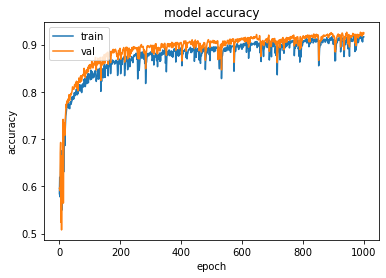

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Ternary classification with $A_6$, $D_6$ and $E_6$ <a class="anchor" id="4"></a>

Let's introduce $b$-matrices of $E_6$ type to see how our model can handle a ternary classification.

In [3]:
with open('cluster_data_A6_depth_6.csv') as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    data = [row for row in reader]
    
data=data[0]

cluster_type = data[0]

data = [np.array(np.matrix(data[i])).ravel() for i in range(1, len(data))]
                                                                           
data = [np.append(i, np.array([1, 0, 0])) for i in data] # Now we have 3 labels need to relabel targets as 3-d basis vectors
A6_data = data
A_array = A6_data[0]
for i in range(1, len(A6_data)):
    A_array = np.vstack([A_array, A6_data[i]])
    

with open('cluster_data_D6_depth_6.csv') as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    data = [row for row in reader]
    
data=data[0]

cluster_type = data[0]

data = [np.array(np.matrix(data[i])).ravel() for i in range(1, len(data))]
                                                                           
data = [np.append(i, np.array([0, 1, 0])) for i in data]
D6_data = data
D_array = D6_data[0]
for i in range(1, len(D6_data)):
    D_array = np.vstack([D_array, D6_data[i]])
    
with open('cluster_data_E6_depth_6.csv') as fp:
    reader = csv.reader(fp, delimiter=",", quotechar='"')
    data = [row for row in reader]
    
data=data[0]

cluster_type = data[0]

data = [np.array(np.matrix(data[i])).ravel() for i in range(1, len(data))]
                                                                           
data = [np.append(i, np.array([0, 0, 1])) for i in data]
E6_data = data
E_array = E6_data[0]
for i in range(1, len(E6_data)):
    E_array = np.vstack([E_array, E6_data[i]])
    
# Features, targets
X = np.vstack([A_array[:,:-3], D_array[:,:-3]])

X = np.vstack([X, E_array[:,:-3]])

y = np.vstack([A_array[:,-3:], D_array[:,-3:]])

y = np.vstack([y, E_array[:,-3:]])

# Reshape as matrices
Z = np.array([np.resize(X[0], (6,6))])
for i in range(1, len(X)):
    new = np.resize(X[i], (6,6))
    new2 = np.array([new])
    Z = np.append(Z, new2, axis=0)

X = Z

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

Now we run our model. This model is very slow to run and we see that around epoch $300$ it levels out at around accuracy $0.8$.

In [24]:
input_shape = (6, 6, 1)

model = Sequential([
    Input(shape=input_shape),
    Conv2D(filters=100, kernel_size=[2,2]), 
    Activation("relu"),
    Dense(100),
    Activation("elu"),
    Conv2D(filters=20, kernel_size=[2,2]),
    Dense(20),
    Activation("elu"),
    Conv2D(filters=10, kernel_size=[2,2]),
    Activation("elu"),
    Dropout(rate=0.1),
    Dense(10),
    Activation("elu"),
    Dropout(rate=0.2), 
    Flatten(),
    Dense(3)
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)

lr_schedule = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1e-2,
    decay_steps=300,
    end_learning_rate=1e-3,
    power=0.5)

model.compile(
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = keras.optimizers.RMSprop(lr_schedule),
    metrics = ["accuracy"],
)

history = model.fit(X_train, y_train, batch_size=500, epochs=1000, validation_split=0.2, verbose=True, callbacks=[callback])
test_scores = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/1000
31/31 [==============================] - 3s 50ms/step - loss: 0.6988 - accuracy: 0.3392 - val_loss: 0.6769 - val_accuracy: 0.3506
Epoch 2/1000
31/31 [==============================] - 1s 43ms/step - loss: 0.6410 - accuracy: 0.3691 - val_loss: 0.7316 - val_accuracy: 0.3618
Epoch 3/1000
31/31 [==============================] - 1s 37ms/step - loss: 0.6227 - accuracy: 0.4374 - val_loss: 0.7210 - val_accuracy: 0.4028
Epoch 4/1000
31/31 [==============================] - 1s 43ms/step - loss: 0.6067 - accuracy: 0.4739 - val_loss: 0.6142 - val_accuracy: 0.4596
Epoch 5/1000
31/31 [==============================] - 2s 53ms/step - loss: 0.5886 - accuracy: 0.5030 - val_loss: 0.6400 - val_accuracy: 0.4508
Epoch 6/1000
31/31 [==============================] - 2s 51ms/step - loss: 0.5738 - accuracy: 0.5312 - val_loss: 0.6378 - val_accuracy: 0.4628
Epoch 7/1000
31/31 [==============================] - 1s 45ms/step - loss: 0.5542 - accuracy: 0.5587 - val_loss: 0.6479 - val_accuracy: 0.4489

Epoch 58/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.4428 - accuracy: 0.6849 - val_loss: 0.4409 - val_accuracy: 0.6958
Epoch 59/1000
31/31 [==============================] - 1s 41ms/step - loss: 0.4404 - accuracy: 0.6936 - val_loss: 0.4544 - val_accuracy: 0.6689
Epoch 60/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.4390 - accuracy: 0.6921 - val_loss: 0.4327 - val_accuracy: 0.6931
Epoch 61/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.4357 - accuracy: 0.7008 - val_loss: 0.4425 - val_accuracy: 0.6812
Epoch 62/1000
31/31 [==============================] - 1s 40ms/step - loss: 0.4376 - accuracy: 0.6962 - val_loss: 0.4402 - val_accuracy: 0.6777
Epoch 63/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.4384 - accuracy: 0.6980 - val_loss: 0.4337 - val_accuracy: 0.6854
Epoch 64/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.4370 - accuracy: 0.6989 - val_loss: 0.4312 - val_accuracy:

Epoch 115/1000
31/31 [==============================] - 1s 47ms/step - loss: 0.3937 - accuracy: 0.7310 - val_loss: 0.4024 - val_accuracy: 0.7206
Epoch 116/1000
31/31 [==============================] - 2s 50ms/step - loss: 0.3924 - accuracy: 0.7359 - val_loss: 0.3945 - val_accuracy: 0.7267
Epoch 117/1000
31/31 [==============================] - 1s 47ms/step - loss: 0.3914 - accuracy: 0.7392 - val_loss: 0.3924 - val_accuracy: 0.7241
Epoch 118/1000
31/31 [==============================] - 1s 46ms/step - loss: 0.3935 - accuracy: 0.7374 - val_loss: 0.4033 - val_accuracy: 0.7155
Epoch 119/1000
31/31 [==============================] - 1s 42ms/step - loss: 0.3912 - accuracy: 0.7371 - val_loss: 0.3864 - val_accuracy: 0.7310
Epoch 120/1000
31/31 [==============================] - 1s 40ms/step - loss: 0.3885 - accuracy: 0.7425 - val_loss: 0.4085 - val_accuracy: 0.7075
Epoch 121/1000
31/31 [==============================] - 1s 39ms/step - loss: 0.3916 - accuracy: 0.7380 - val_loss: 0.3859 - val_ac

31/31 [==============================] - 1s 40ms/step - loss: 0.3506 - accuracy: 0.7731 - val_loss: 0.3707 - val_accuracy: 0.7449
Epoch 228/1000
31/31 [==============================] - 1s 43ms/step - loss: 0.3498 - accuracy: 0.7731 - val_loss: 0.3583 - val_accuracy: 0.7617
Epoch 229/1000
31/31 [==============================] - 1s 40ms/step - loss: 0.3497 - accuracy: 0.7720 - val_loss: 0.3622 - val_accuracy: 0.7526
Epoch 230/1000
31/31 [==============================] - 1s 44ms/step - loss: 0.3484 - accuracy: 0.7755 - val_loss: 0.3651 - val_accuracy: 0.7537
Epoch 231/1000
31/31 [==============================] - 1s 42ms/step - loss: 0.3483 - accuracy: 0.7694 - val_loss: 0.3735 - val_accuracy: 0.7398
Epoch 232/1000
31/31 [==============================] - 1s 39ms/step - loss: 0.3481 - accuracy: 0.7726 - val_loss: 0.3544 - val_accuracy: 0.7643
Epoch 233/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.3501 - accuracy: 0.7727 - val_loss: 0.3481 - val_accuracy: 0.7702


31/31 [==============================] - 1s 37ms/step - loss: 0.3249 - accuracy: 0.7927 - val_loss: 0.3270 - val_accuracy: 0.7830
Epoch 340/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.3242 - accuracy: 0.7906 - val_loss: 0.3364 - val_accuracy: 0.7859
Epoch 341/1000
31/31 [==============================] - 1s 37ms/step - loss: 0.3257 - accuracy: 0.7884 - val_loss: 0.3295 - val_accuracy: 0.7819
Epoch 342/1000
31/31 [==============================] - 1s 41ms/step - loss: 0.3262 - accuracy: 0.7927 - val_loss: 0.3523 - val_accuracy: 0.7673
Epoch 343/1000
31/31 [==============================] - 1s 41ms/step - loss: 0.3270 - accuracy: 0.7883 - val_loss: 0.3695 - val_accuracy: 0.7585
Epoch 344/1000
31/31 [==============================] - 1s 41ms/step - loss: 0.3257 - accuracy: 0.7915 - val_loss: 0.3256 - val_accuracy: 0.7921
Epoch 345/1000
31/31 [==============================] - 1s 41ms/step - loss: 0.3252 - accuracy: 0.7913 - val_loss: 0.3240 - val_accuracy: 0.7905


31/31 [==============================] - 1s 41ms/step - loss: 0.3131 - accuracy: 0.8029 - val_loss: 0.3427 - val_accuracy: 0.7731
Epoch 452/1000
31/31 [==============================] - 1s 41ms/step - loss: 0.3135 - accuracy: 0.7991 - val_loss: 0.3299 - val_accuracy: 0.7811
Epoch 453/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.3137 - accuracy: 0.8034 - val_loss: 0.3189 - val_accuracy: 0.7931
Epoch 454/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.3162 - accuracy: 0.7987 - val_loss: 0.3453 - val_accuracy: 0.7731
Epoch 455/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.3135 - accuracy: 0.8011 - val_loss: 0.3322 - val_accuracy: 0.7835
Epoch 456/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.3133 - accuracy: 0.8035 - val_loss: 0.3366 - val_accuracy: 0.7779
Epoch 457/1000
31/31 [==============================] - 1s 37ms/step - loss: 0.3136 - accuracy: 0.8026 - val_loss: 0.3524 - val_accuracy: 0.7702


31/31 [==============================] - 1s 38ms/step - loss: 0.3052 - accuracy: 0.8081 - val_loss: 0.3304 - val_accuracy: 0.7787
Epoch 564/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.3071 - accuracy: 0.8069 - val_loss: 0.3356 - val_accuracy: 0.7822
Epoch 565/1000
31/31 [==============================] - 1s 41ms/step - loss: 0.3095 - accuracy: 0.8032 - val_loss: 0.3255 - val_accuracy: 0.7843
Epoch 566/1000
31/31 [==============================] - 1s 40ms/step - loss: 0.3066 - accuracy: 0.8091 - val_loss: 0.3237 - val_accuracy: 0.7835
Epoch 567/1000
31/31 [==============================] - 1s 40ms/step - loss: 0.3050 - accuracy: 0.8102 - val_loss: 0.3201 - val_accuracy: 0.7945
Epoch 568/1000
31/31 [==============================] - 1s 40ms/step - loss: 0.3057 - accuracy: 0.8081 - val_loss: 0.3311 - val_accuracy: 0.7841
Epoch 569/1000
31/31 [==============================] - 1s 42ms/step - loss: 0.3039 - accuracy: 0.8113 - val_loss: 0.3276 - val_accuracy: 0.7883


31/31 [==============================] - 1s 41ms/step - loss: 0.2976 - accuracy: 0.8148 - val_loss: 0.3409 - val_accuracy: 0.7726
Epoch 676/1000
31/31 [==============================] - 1s 39ms/step - loss: 0.2992 - accuracy: 0.8129 - val_loss: 0.3212 - val_accuracy: 0.7971
Epoch 677/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.3009 - accuracy: 0.8115 - val_loss: 0.3196 - val_accuracy: 0.7849
Epoch 678/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.2987 - accuracy: 0.8136 - val_loss: 0.3161 - val_accuracy: 0.8019
Epoch 679/1000
31/31 [==============================] - 1s 39ms/step - loss: 0.3040 - accuracy: 0.8079 - val_loss: 0.3204 - val_accuracy: 0.7985
Epoch 680/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.2998 - accuracy: 0.8136 - val_loss: 0.3253 - val_accuracy: 0.7921
Epoch 681/1000
31/31 [==============================] - 1s 38ms/step - loss: 0.2985 - accuracy: 0.8135 - val_loss: 0.3551 - val_accuracy: 0.7619


31/31 [==============================] - 2s 51ms/step - loss: 0.2958 - accuracy: 0.8150 - val_loss: 0.3308 - val_accuracy: 0.7889
Epoch 788/1000
31/31 [==============================] - 1s 47ms/step - loss: 0.2922 - accuracy: 0.8187 - val_loss: 0.3405 - val_accuracy: 0.7822
Epoch 789/1000
31/31 [==============================] - 2s 52ms/step - loss: 0.2956 - accuracy: 0.8185 - val_loss: 0.3228 - val_accuracy: 0.7865
Epoch 790/1000
31/31 [==============================] - 2s 58ms/step - loss: 0.2958 - accuracy: 0.8137 - val_loss: 0.3258 - val_accuracy: 0.7822
Epoch 791/1000
31/31 [==============================] - 2s 53ms/step - loss: 0.2975 - accuracy: 0.8130 - val_loss: 0.3226 - val_accuracy: 0.7926
Epoch 792/1000
31/31 [==============================] - 2s 51ms/step - loss: 0.2955 - accuracy: 0.8176 - val_loss: 0.3204 - val_accuracy: 0.7931
Epoch 793/1000
31/31 [==============================] - 1s 45ms/step - loss: 0.2969 - accuracy: 0.8124 - val_loss: 0.3408 - val_accuracy: 0.7761


31/31 [==============================] - 1s 40ms/step - loss: 0.2916 - accuracy: 0.8175 - val_loss: 0.3465 - val_accuracy: 0.7689
Epoch 900/1000
31/31 [==============================] - 1s 43ms/step - loss: 0.2921 - accuracy: 0.8164 - val_loss: 0.3227 - val_accuracy: 0.7921
Epoch 901/1000
31/31 [==============================] - 1s 40ms/step - loss: 0.2928 - accuracy: 0.8178 - val_loss: 0.3156 - val_accuracy: 0.7947
Epoch 902/1000
31/31 [==============================] - 1s 40ms/step - loss: 0.2924 - accuracy: 0.8185 - val_loss: 0.3191 - val_accuracy: 0.7934
Epoch 903/1000
31/31 [==============================] - 1s 41ms/step - loss: 0.2886 - accuracy: 0.8224 - val_loss: 0.3175 - val_accuracy: 0.7945
Epoch 904/1000
31/31 [==============================] - 1s 42ms/step - loss: 0.2909 - accuracy: 0.8183 - val_loss: 0.3523 - val_accuracy: 0.7787
Epoch 905/1000
31/31 [==============================] - 1s 43ms/step - loss: 0.2906 - accuracy: 0.8221 - val_loss: 0.3224 - val_accuracy: 0.7915


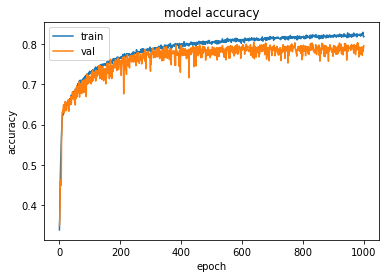

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()